In [ ]:
%pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import math
import requests
import csv
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from colour import Color
import seaborn as sns

# data from https://www.pro-football-reference.com/years/2022/defense_advanced.htm

Mounted at /content/drive


In [ ]:
baseline = pd.read_csv('/content/drive/MyDrive/senior_project_2023/baseline.csv').iloc[:, 1:]
grades = pd.read_csv('/content/drive/MyDrive/senior_project_2023/gradeDF.csv').iloc[:, 1:]
grades2 = pd.read_csv('/content/drive/MyDrive/senior_project_2023/gradeDF.csv').iloc[:, 1:]
concretes = pd.read_csv('/content/drive/MyDrive/senior_project_2023/playerstats.csv').iloc[:, 1:]
concretes2 = pd.read_csv('/content/drive/MyDrive/senior_project_2023/playerstats.csv').iloc[:, 1:]

In [ ]:
concretes

,player,Rk,Tm,Age,Pos,G,GS,Int,Tgt,Cmp,...,Yds/Cmp,Yds/Tgt,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV
0,Foyesade Oluokun,1,JAX,27,LB,17,17,0,90,71,...,7.9,6.2,1,96.3,3.4,187,374,74,215,8
1,Nick Bolton,2,KAN,22,LB,17,17,2,74,61,...,9.5,7.8,1,92.6,3.7,214,366,72,237,7
2,Jordyn Brooks,3,SEA,25,LB,16,16,0,75,54,...,12.8,9.2,5,122.6,5.0,194,495,72,240,7
3,Roquan Smith,4,2TM,25,LB,17,17,3,69,49,...,8.6,6.1,2,78.1,4.4,153,266,73,232,17
4,Zaire Franklin,5,IND,26,LB,17,17,0,73,55,...,8.3,6.3,0,91.1,2.9,102,357,72,235,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Chase Lucas,886,DET,25,CB,6,0,0,1,1,...,6.0,6.0,0,91.7,3.0,3,3,72,185,0
541,Darius Phillips,890,DEN,27,CB,9,0,0,1,1,...,5.0,5.0,0,87.5,-7.0,-7,12,70,190,0
542,Channing Tindall,893,MIA,22,LB,16,0,0,1,1,...,9.0,9.0,0,104.2,6.0,6,3,74,230,1
543,Joshuah Bledsoe,900,NWE,24,S,3,0,0,4,2,...,8.5,4.3,2,101.0,19.3,17,0,72,200,0


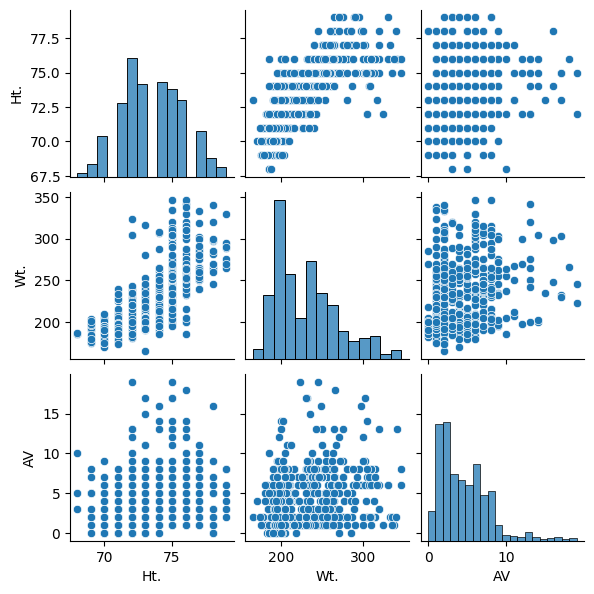

In [ ]:
sns.pairplot(concretes, vars = ['Ht.', 'Wt.', 'AV'], height = 2)

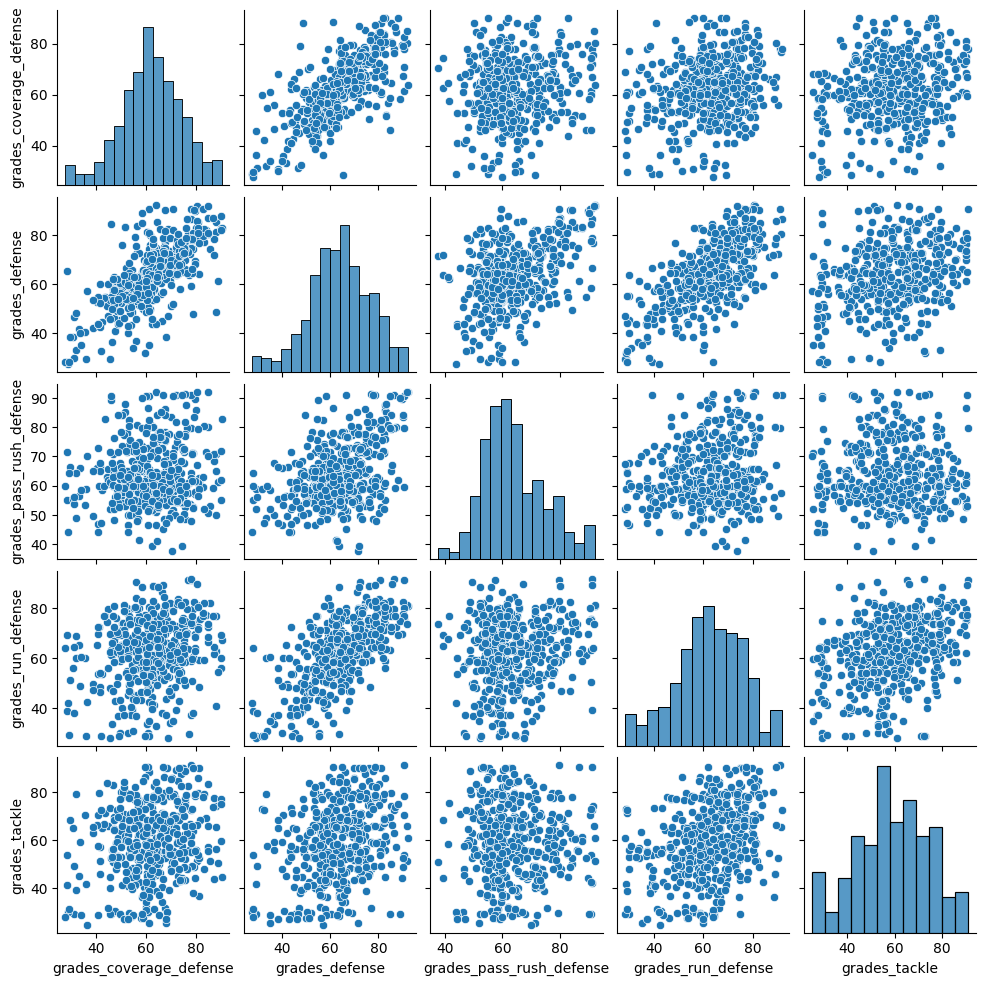

In [ ]:
sns.pairplot(grades, vars = ['grades_coverage_defense', 'grades_defense', 'grades_pass_rush_defense', 
                             'grades_run_defense', 'grades_tackle'], height = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardizing our dataframes so that we can make a legible correlation table
newscale = StandardScaler()
stdized1 = concretes
stdized1.loc[:,'G':'AV'] = newscale.fit_transform(stdized1.loc[:,'G':'AV'])

stdized2 = grades
stdized2.loc[:,'grades_coverage_defense':] = newscale.fit_transform(stdized2.loc[:,'grades_coverage_defense':])


In [ ]:
stdized1.corr()

<ipython-input-8-fa8cac8d8763>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stdized1.corr()


,Rk,Age,G,GS,Int,Tgt,Cmp,Yds,Yds/Cmp,Yds/Tgt,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV
Rk,1.000000,-0.024085,-0.546742,-0.786200,-0.442187,-0.720236,-0.742344,-0.703760,-0.039529,0.033983,-0.469770,0.047264,-0.112991,-0.581393,-0.727911,0.127017,0.113542,-0.642375
Age,-0.024085,1.000000,-0.042129,0.145685,0.034020,-0.078454,-0.075931,-0.083059,-0.063149,-0.014468,-0.084926,-0.044138,-0.162362,-0.102460,-0.040372,0.015645,0.191228,0.136752
G,-0.546742,-0.042129,1.000000,0.461476,0.175459,0.239222,0.248800,0.225056,-0.073730,-0.083769,0.176995,-0.041571,-0.190872,0.152761,0.277401,0.145452,0.196706,0.479996
GS,-0.786200,0.145685,0.461476,1.000000,0.370346,0.518279,0.521524,0.489548,-0.028165,-0.066089,0.362046,-0.110242,-0.039510,0.390750,0.524750,0.045742,0.121502,0.830497
Int,-0.442187,0.034020,0.175459,0.370346,1.000000,0.514488,0.492936,0.527648,0.153118,0.038234,0.511539,-0.266826,0.343473,0.524203,0.426943,-0.269668,-0.335377,0.302255
Tgt,-0.720236,-0.078454,0.239222,0.518279,0.514488,1.000000,0.979809,0.956308,0.155699,-0.000115,0.673443,-0.027760,0.438571,0.874792,0.875074,-0.419137,-0.502997,0.325813
Cmp,-0.742344,-0.075931,0.248800,0.521524,0.492936,0.979809,1.000000,0.953849,0.132332,0.019468,0.644166,0.040259,0.382088,0.837815,0.919550,-0.400585,-0.468818,0.331014
Yds,-0.703760,-0.083059,0.225056,0.489548,0.527648,0.956308,0.953849,1.000000,0.271288,0.117518,0.721236,0.108228,0.503712,0.937759,0.884107,-0.447718,-0.529610,0.274951
Yds/Cmp,-0.039529,-0.063149,-0.073730,-0.028165,0.153118,0.155699,0.132332,0.271288,1.000000,0.893796,0.223291,0.331282,0.495960,0.303400,0.173920,-0.251088,-0.282818,-0.096134
Yds/Tgt,0.033983,-0.014468,-0.083769,-0.066089,0.038234,-0.000115,0.019468,0.117518,0.893796,1.000000,0.083801,0.477107,0.252270,0.123723,0.085708,-0.116201,-0.074042,-0.096038


In [ ]:
stdized2.corr()

<ipython-input-9-661ae843dfab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stdized2.corr()


,grades_coverage_defense,grades_defense,grades_pass_rush_defense,grades_run_defense,grades_tackle
grades_coverage_defense,1.000000,0.700026,0.120783,0.218290,0.214376
grades_defense,0.700026,1.000000,0.448420,0.669753,0.283220
grades_pass_rush_defense,0.120783,0.448420,1.000000,0.206984,-0.016980
grades_run_defense,0.218290,0.669753,0.206984,1.000000,0.328029
grades_tackle,0.214376,0.283220,-0.016980,0.328029,1.000000


In [ ]:
stdized2.corr()['grades_defense']

<ipython-input-10-f1ae00a9de66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stdized2.corr()['grades_defense']


grades_coverage_defense     0.700026
grades_defense              1.000000
grades_pass_rush_defense    0.448420
grades_run_defense          0.669753
grades_tackle               0.283220
Name: grades_defense, dtype: float64

<ipython-input-11-d0700c0c71d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlations = stdized1.corr()


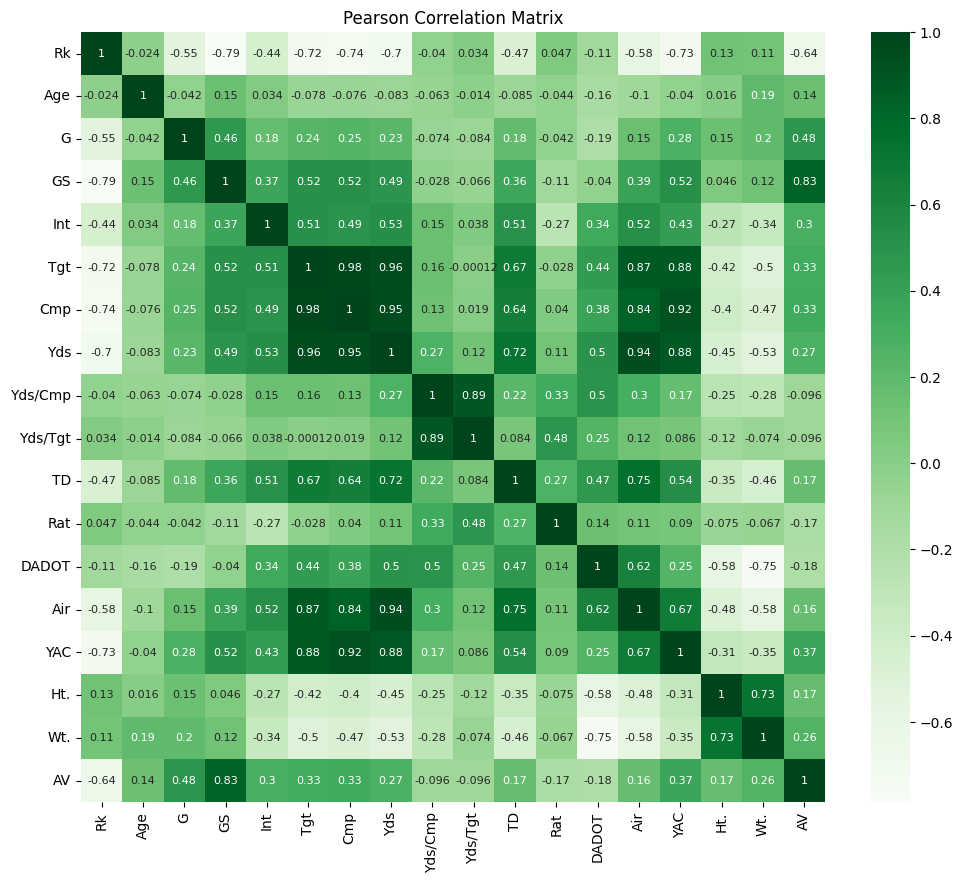

In [ ]:
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = stdized1.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
highs = new_correlations[new_correlations > 0.75]
highs.fillna('-')

,Rk,Age,G,GS,Int,Tgt,Cmp,Yds,Yds/Cmp,Yds/Tgt,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV
Rk,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Age,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
G,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GS,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,0.830497
Int,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-
Tgt,-,-,-,-,-,1.0,0.979809,0.956308,-,-,-,-,-,0.874792,0.875074,-,-,-
Cmp,-,-,-,-,-,0.979809,1.0,0.953849,-,-,-,-,-,0.837815,0.91955,-,-,-
Yds,-,-,-,-,-,0.956308,0.953849,1.0,-,-,-,-,-,0.937759,0.884107,-,-,-
Yds/Cmp,-,-,-,-,-,-,-,-,1.0,0.893796,-,-,-,-,-,-,-,-
Yds/Tgt,-,-,-,-,-,-,-,-,0.893796,1.0,-,-,-,-,-,-,-,-


<ipython-input-13-41facf173750>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlations = stdized2.corr()


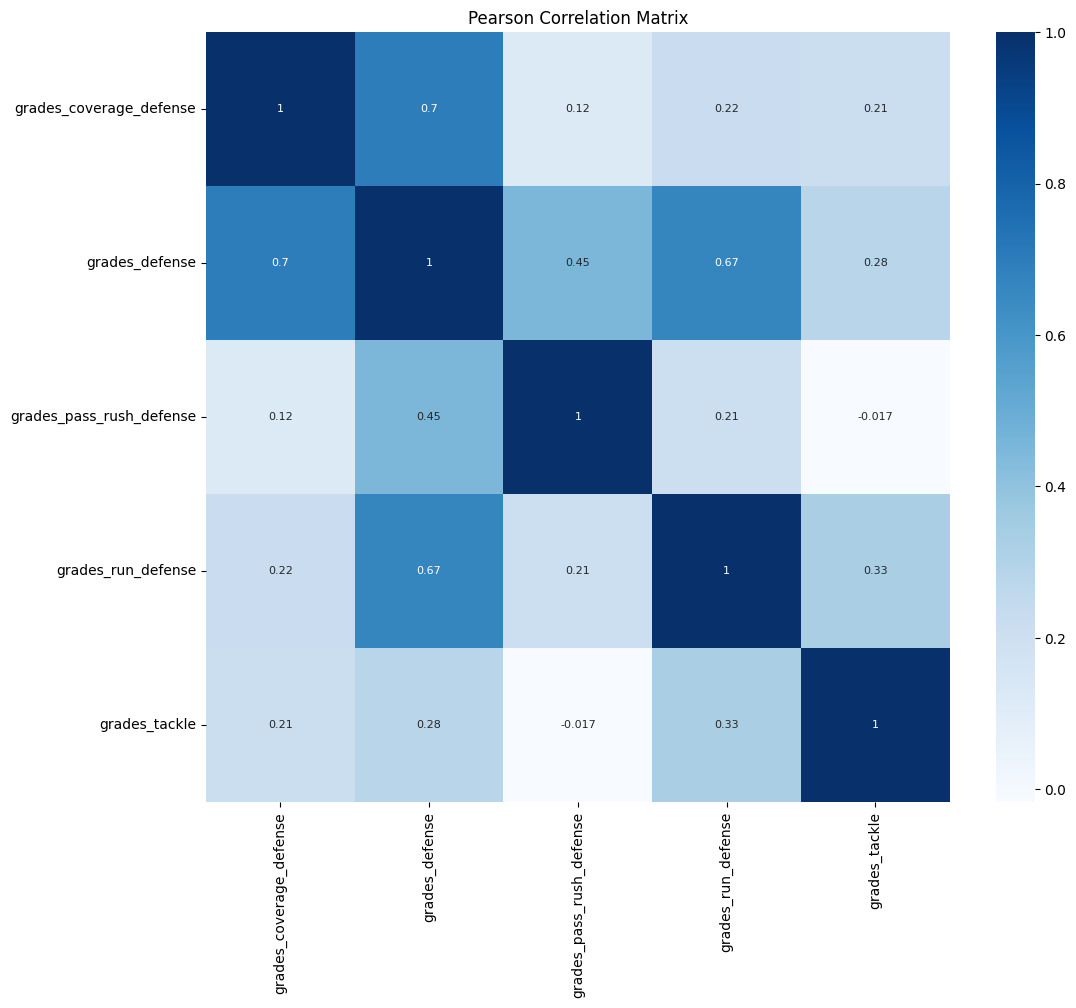

In [ ]:
fig_2 = plt.figure(figsize=(12, 10))
new_correlations = stdized2.corr()
sns.heatmap(new_correlations, annot=True, cmap='Blues', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

**BUILDING PREDICTIVE MODEL BASED ON GRADES**

In [ ]:
ranges = grades2
ranges['coverage range'] = pd.cut(ranges['grades_coverage_defense'], [0, 50, 70, 80, 90, 100], 
                          labels = ['Poor', 'Average', 'Good', 'Great', 'Outstanding'])

ranges['tackle range'] = pd.cut(ranges['grades_tackle'], [0, 50, 70, 80, 90, 100], 
                          labels = ['Poor', 'Average', 'Good', 'Great', 'Outstanding'])

ranges['run range'] = pd.cut(ranges['grades_run_defense'], [0, 50, 70, 80, 90, 100], 
                          labels = ['Poor', 'Average', 'Good', 'Great', 'Outstanding'])

ranges['pass rush range'] = pd.cut(ranges['grades_pass_rush_defense'], [0, 50, 70, 80, 90, 100], 
                          labels = ['Poor', 'Average', 'Good', 'Great', 'Outstanding'])



In [ ]:
ranges

,player,grades_coverage_defense,grades_defense,grades_pass_rush_defense,grades_run_defense,grades_tackle,coverage range,tackle range,run range,pass rush range
0,Brandon Graham,79.5,89.8,89.8,69.7,44.5,Good,Poor,Average,Great
1,Jason Pierre-Paul,59.1,56.5,56.0,58.7,40.4,Average,Poor,Average,Average
2,Kareem Jackson,60.9,64.5,56.7,71.3,57.4,Average,Average,Good,Average
3,Devin McCourty,67.6,70.0,53.8,74.8,90.0,Average,Great,Good,Average
4,Jerry Hughes,68.1,71.4,71.3,59.7,25.6,Average,Poor,Average,Good
...,...,...,...,...,...,...,...,...,...,...
443,Dane Belton,42.3,32.8,47.2,28.9,72.5,Poor,Good,Poor,Poor
444,Leo Chenal,62.6,70.3,63.6,72.0,57.6,Average,Average,Good,Average
445,Rodney Thomas II,54.8,54.3,52.5,55.4,71.5,Average,Good,Average,Average
446,Jaylen Watson,59.9,61.2,77.9,58.6,58.2,Average,Average,Average,Good


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

In [ ]:
regr = smf.ols(formula = 'grades_defense ~ grades_coverage_defense + grades_pass_rush_defense + grades_run_defense + grades_tackle',
               data = ranges)
out = regr.fit()
print(out.summary())

                            OLS Regression Results                            
Dep. Variable:         grades_defense   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     603.7
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          8.63e-178
Time:                        17:10:09   Log-Likelihood:                -1357.4
No. Observations:                 448   AIC:                             2725.
Df Residuals:                     443   BIC:                             2745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
ranges['predicted'] = (ranges['grades_coverage_defense']*0.5818 + ranges['grades_run_defense']*0.4514 + 
                       ranges['grades_tackle']*0.007 + ranges['grades_pass_rush_defense']*0.3283 - 21.9203)

ranges['residual'] = ranges['grades_defense'] - ranges['predicted']

In [ ]:
ranges.sort_values(by = 'residual', ascending = False).head(10)

,player,grades_coverage_defense,grades_defense,grades_pass_rush_defense,grades_run_defense,grades_tackle,coverage range,tackle range,run range,pass rush range,predicted,residual
106,Haason Reddick,46.1,84.6,90.7,63.4,29.4,Poor,Poor,Average,Outstanding,63.50205,21.09795
165,Josh Uche,51.8,83.1,87.8,63.7,59.6,Average,Average,Average,Great,66.21306,16.88694
239,Bradley Chubb,28.6,65.5,71.4,69.3,41.4,Poor,Poor,Average,Good,49.73162,15.76838
348,A.J. Epenesa,36.5,57.1,70.0,42.4,25.0,Poor,Poor,Poor,Average,41.61076,15.48924
59,Za'Darius Smith,51.9,83.3,85.4,72.5,60.9,Average,Average,Good,Great,69.46474,13.83526
356,Jaelan Phillips,58.3,88.8,90.1,74.8,29.6,Average,Poor,Good,Outstanding,75.55039,13.24961
30,Aaron Donald,61.4,90.5,90.7,75.6,53.9,Average,Average,Good,Outstanding,78.08217,12.41783
406,Christian Barmore,53.2,68.6,80.4,46.9,77.4,Average,Good,Poor,Great,57.13924,11.46076
404,Odafe Oweh,41.8,60.1,67.8,53.9,46.0,Poor,Poor,Average,Average,49.31014,10.78986
389,Gregory Rousseau,61.2,80.9,82.5,64.6,54.8,Average,Average,Average,Great,70.31465,10.58535


<Axes: ylabel='Frequency'>

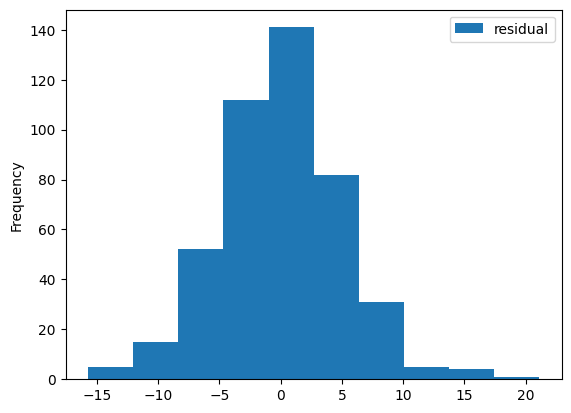

In [ ]:
ranges.iloc[:, -1:].plot.hist(bins=10)

In [ ]:
freg = smf.ols(formula = "AV ~ Age + GS + Int + Yds + TD + Rat + DADOT",
               data = concretes2)
fout = freg.fit()
print(fout.summary())

                            OLS Regression Results                            
Dep. Variable:                     AV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     206.5
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          7.92e-148
Time:                        17:10:09   Log-Likelihood:                -1080.0
No. Observations:                 545   AIC:                             2176.
Df Residuals:                     537   BIC:                             2210.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6704      0.778      2.147      0.0

In [ ]:
concretes2['predicted'] = (concretes2['Age']*-0.0305 + concretes2['GS']*0.4650 + 
                       concretes2['Int']*0.3486 + concretes2['Yds']*-0.0016 +
                       concretes2['TD']*-0.2209 + concretes2['Rat']*0.0021 + concretes2['DADOT']*-0.0614 + 1.6704)

concretes2['residual'] = concretes2['AV'] - concretes2['predicted']

In [ ]:
concretes2.sort_values(by = 'residual', ascending = False).head(10)

,player,Rk,Tm,Age,Pos,G,GS,Int,Tgt,Cmp,...,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV,predicted,residual
34,Matt Milano,42,BUF,28,LB,15,15,3,68,45,...,0,62.6,3.7,129,259,72,223,19,8.12068,10.87932
154,Micah Parsons,174,DAL,23,LB,17,17,0,11,9,...,1,128.0,0.5,-9,91,75,245,19,8.75990,10.24010
158,Nick Bosa,178,SFO,25,DE,16,16,0,3,3,...,0,79.2,-1.3,-4,10,76,266,18,8.58444,9.41556
20,Fred Warner,26,SFO,26,LB,17,17,1,68,41,...,0,73.0,4.3,142,296,75,230,17,8.31948,8.68052
3,Roquan Smith,4,2TM,25,LB,17,17,3,69,49,...,2,78.1,4.4,153,266,73,232,17,8.64035,8.35965
209,Quinnen Williams,240,NYJ,25,DT,16,16,0,2,1,...,0,58.3,-3.5,-3,10,75,303,17,8.67403,8.32597
213,Marcus Jones,245,NWE,24,DB,15,4,2,41,24,...,1,75.4,14.8,271,90,68,185,10,1.94672,8.05328
89,Demario Davis,101,NOR,33,LB,17,17,1,49,33,...,2,86.6,3.0,61,213,74,248,16,8.03496,7.96504
237,Chris Jones,273,KAN,28,DT,17,17,0,5,4,...,0,105.8,-4.2,-23,70,78,298,16,9.12626,6.87374
131,Patrick Surtain II,142,DEN,22,CB,17,17,2,77,45,...,4,82.6,11.5,360,108,74,202,14,7.43656,6.56344


In [ ]:
concretes2[concretes2['Tm'] == 'LAR'].sort_values(by='residual')

,player,Rk,Tm,Age,Pos,G,GS,Int,Tgt,Cmp,...,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV,predicted,residual
74,Taylor Rapp,85,LAR,25,DB,16,16,2,53,38,...,4,98.3,6.5,174,170,72,208,5,7.41843,-2.41843
81,Nick Scott,93,LAR,27,DB,17,16,2,58,46,...,4,118.5,7.9,322,279,71,201,5,6.90269,-1.90269
456,Jordan Fuller,648,LAR,24,DB,3,1,0,7,5,...,0,86.6,3.9,32,10,74,203,0,1.27860,-1.27860
49,Ernest Jones,57,LAR,23,LB,17,11,1,53,42,...,0,85.0,3.4,128,205,74,230,5,5.86944,-0.86944
458,Terrell Lewis,652,LAR,24,OLB,11,3,1,11,6,...,0,22.2,0.4,-10,39,77,262,2,2.65766,-0.65766
228,Leonard Floyd,262,LAR,30,LB,17,17,0,13,10,...,0,108.5,2.8,19,113,77,240,8,8.50513,-0.50513
478,Quentin Lake,680,LAR,23,S,9,0,0,2,2,...,0,118.7,12.0,24,15,73,205,0,0.41897,-0.41897
191,Derion Kendrick,219,LAR,22,CB,15,6,0,59,40,...,2,106.4,10.3,333,184,72,190,2,2.11142,-0.11142
381,Russ Yeast,497,LAR,23,S,15,1,0,7,6,...,0,111.9,8.9,42,34,70,195,1,1.00083,-0.00083
384,Cobie Durant,501,LAR,24,DB,13,1,3,22,13,...,1,52.7,5.2,56,80,71,175,2,1.80209,0.19791


<Axes: ylabel='Frequency'>

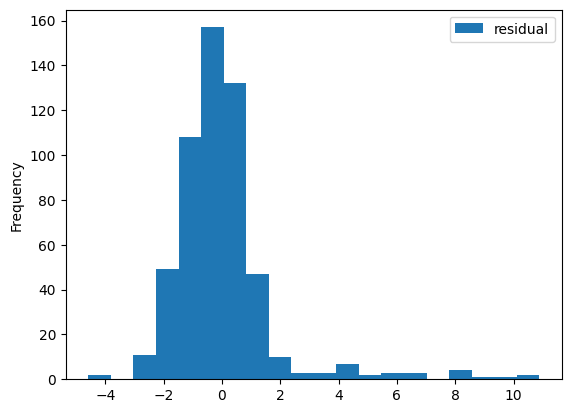

In [ ]:
concretes2.iloc[:, -1:].plot.hist(bins=20)

GOING BACK TO PCA

In [ ]:
z = stdized2['player']

y = stdized2['grades_defense'].values


x = stdized2.loc[:, ~stdized2.columns.isin(['player', 'grades_defense'])].values

In [ ]:
stdized2

,player,grades_coverage_defense,grades_defense,grades_pass_rush_defense,grades_run_defense,grades_tackle
0,Brandon Graham,1.428066,2.042646,2.365957,0.532380,-0.938489
1,Jason Pierre-Paul,-0.244052,-0.575130,-0.745502,-0.268881,-1.203398
2,Kareem Jackson,-0.096512,0.053765,-0.681063,0.648927,-0.104994
3,Devin McCourty,0.452664,0.486130,-0.948023,0.903873,2.001356
4,Jerry Hughes,0.493647,0.596187,0.662940,-0.196039,-2.159656
...,...,...,...,...,...,...
443,Dane Belton,-1.621090,-2.438232,-1.555586,-2.439569,0.870646
444,Leo Chenal,0.042831,0.509714,-0.045884,0.699916,-0.092072
445,Rodney Thomas II,-0.596508,-0.748077,-1.067694,-0.509259,0.806035
446,Jaylen Watson,-0.178479,-0.205654,1.270503,-0.276165,-0.053305


In [ ]:
from sklearn.decomposition import PCA

pcagrades = PCA(n_components=4)

principalComponentsgrades = pcagrades.fit_transform(x)

labs = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4']

pcgradesDF = pd.DataFrame(data = principalComponentsgrades, columns = labs)

gradesDF = pd.concat([pcgradesDF, z], axis = 1)

gradesDF

,principal component 1,principal component 2,principal component 3,principal component 4,player
0,-1.278461,2.489101,0.979433,0.109270,Brandon Graham
1,1.156370,-0.014324,0.302245,0.840862,Jason Pierre-Paul
2,-0.079654,-0.500501,-0.250000,0.765470,Kareem Jackson
3,-1.542860,-1.827570,-0.402535,-0.208810,Devin McCourty
4,0.811139,1.668021,0.994640,0.977840,Jerry Hughes
...,...,...,...,...,...
443,2.321706,-1.826763,-0.420200,-1.689187,Dane Belton
444,-0.385298,0.033029,-0.227785,0.548515,Leo Chenal
445,0.514336,-1.333030,-0.387457,-0.461732,Rodney Thomas II
446,-0.110311,1.106297,-0.170008,-0.678364,Jaylen Watson


In [ ]:
grn = Color("green")
gy = list(grn.range_to(Color("yellow"), gradesDF.shape[0]))

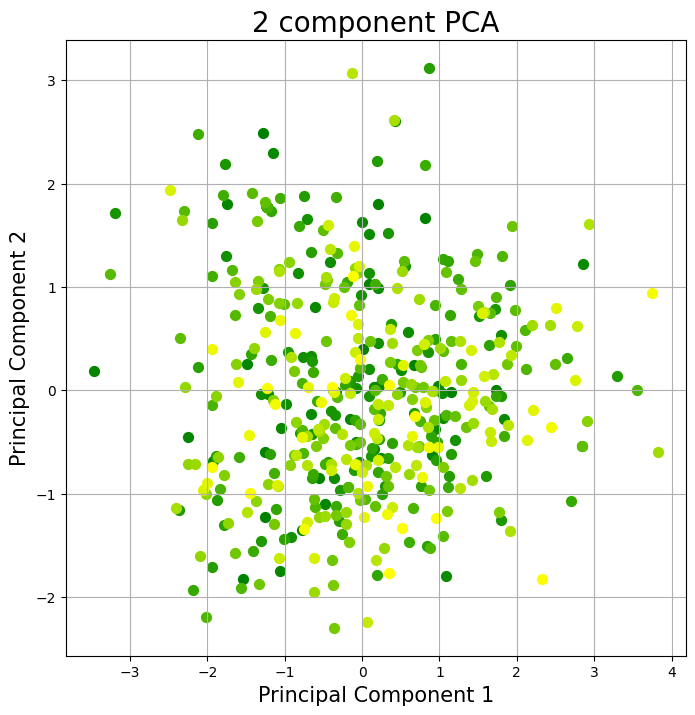

In [ ]:
gfig = plt.figure(figsize = (8,8))
axg = gfig.add_subplot(1,1,1) 
axg.set_xlabel('Principal Component 1', fontsize = 15)
axg.set_ylabel('Principal Component 2', fontsize = 15)
axg.set_title('2 component PCA', fontsize = 20)

targets = list(stdized2['player'])
colors = gy
for target, color in zip(targets,colors):
    indicesToKeep = gradesDF['player'] == target
    axg.scatter(gradesDF.loc[indicesToKeep, 'principal component 1']
               , gradesDF.loc[indicesToKeep, 'principal component 2']
               , c = str(color)
               , s = 50)
axg.grid()

In [ ]:
sum([float(i)/sum(pcagrades.explained_variance_) for i in pcagrades.explained_variance_][:3])

0.849409322111672

In [ ]:
stdized1

,player,Rk,Tm,Age,Pos,G,GS,Int,Tgt,Cmp,...,Yds/Cmp,Yds/Tgt,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV
0,Foyesade Oluokun,1,JAX,27,LB,0.834818,1.360170,-0.566744,2.316632,2.962120,...,-0.432754,-0.242554,-0.092642,0.181998,-0.352306,0.636086,2.991534,0.190497,-0.390313,1.091242
1,Nick Bolton,2,KAN,22,LB,0.834818,1.360170,1.130375,1.726425,2.401366,...,-0.144008,0.091001,-0.092642,0.021680,-0.298688,0.850063,2.906227,-0.681946,0.182146,0.794768
2,Jordyn Brooks,3,SEA,25,LB,0.590339,1.201672,-0.566744,1.763313,2.008838,...,0.451529,0.382862,2.431852,1.321549,-0.066342,0.691561,4.281810,-0.681946,0.260209,0.794768
3,Roquan Smith,4,2TM,25,LB,0.834818,1.360170,1.978935,1.541985,1.728461,...,-0.306428,-0.263401,0.538482,-0.606589,-0.173579,0.366633,1.839883,-0.245725,0.052042,3.759509
4,Zaire Franklin,5,IND,26,LB,0.834818,1.360170,-0.566744,1.689537,2.064913,...,-0.360568,-0.221707,-0.723766,-0.043313,-0.441670,-0.037546,2.810256,-0.681946,0.130104,1.091242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Chase Lucas,886,DET,25,CB,-1.854452,-1.334287,-0.566744,-0.966397,-0.963160,...,-0.775639,-0.284249,-0.723766,-0.017316,-0.423797,-0.822129,-0.964601,-0.681946,-1.170939,-1.280550
541,Darius Phillips,890,DEN,27,CB,-1.121015,-1.334287,-0.566744,-0.966397,-0.963160,...,-0.956105,-0.492721,-0.723766,-0.199297,-2.211070,-0.901379,-0.868630,-1.554388,-1.040835,-1.280550
542,Channing Tindall,893,MIA,22,LB,0.590339,-1.334287,-0.566744,-0.966397,-0.963160,...,-0.234241,0.341167,-0.723766,0.524296,0.112385,-0.798353,-0.964601,0.190497,0.000000,-0.984076
543,Joshuah Bledsoe,900,NWE,24,S,-2.587890,-1.334287,-0.566744,-0.855733,-0.907084,...,-0.324474,-0.638651,0.538482,0.385644,2.489458,-0.711178,-0.996591,-0.681946,-0.780626,-1.280550


In [ ]:
z1 = stdized1['player']

y1 = stdized1['AV'].values


x1 = stdized1.iloc[:, 5:-1].values

In [ ]:
pcaAV = PCA(n_components=14)

principalComponentsAV = pcaAV.fit_transform(x1)

labs = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4',
        'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8',
        'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12',
        'principal component 13', 'principal component 14']

pcaAVDF = pd.DataFrame(data = principalComponentsAV, columns = labs)

AVDF = pd.concat([pcaAVDF, z1], axis = 1)

AVDF

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,player
0,3.788079,-2.386569,0.928938,-1.615940,2.200457,-0.780637,0.366405,0.296622,-0.738176,0.401395,0.084079,0.439453,0.113819,-0.256675,Foyesade Oluokun
1,3.973667,-2.096283,0.889782,-0.256266,1.634677,-0.590147,-0.785865,0.636392,-0.659050,-0.453838,0.374426,-0.094904,-0.084559,-0.215931,Nick Bolton
2,4.938480,-1.183385,2.081557,-2.290622,1.142532,0.019036,-0.628050,0.428924,0.165674,1.129448,1.727285,-0.705724,-0.669668,0.180113,Jordyn Brooks
3,3.140111,-2.260141,0.265186,0.772841,0.490159,0.065022,-0.779324,0.607129,-0.592538,0.005401,0.339438,0.290871,0.190043,-0.031702,Roquan Smith
4,2.605438,-2.080524,0.746660,-1.120335,2.211261,-1.422622,-0.462782,-0.021619,-0.693823,0.154776,0.581363,0.136545,0.036833,-0.019014,Zaire Franklin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-2.170226,1.549760,-2.067054,-0.592590,0.375675,0.234593,-0.735975,0.197388,-0.054999,0.403685,-0.668762,0.026265,-0.179778,0.058889,Chase Lucas
541,-2.434321,0.659129,-1.911137,-0.793468,0.395472,-0.662127,-1.850789,0.817923,0.885190,0.588581,-1.138525,-0.270603,0.039449,0.061376,Darius Phillips
542,-2.183672,1.032560,0.021532,-0.207859,-0.795678,-0.784111,0.329006,0.553614,-0.314820,-0.211729,-0.018954,0.265642,-0.202118,0.066191,Channing Tindall
543,-1.077363,2.795016,-2.562233,-0.647391,-0.528211,1.317968,0.266532,-0.972490,-0.571394,0.138098,1.208793,0.283471,-0.165746,-0.027776,Joshuah Bledsoe


In [ ]:
blu = Color("blue")
bp = list(blu.range_to(Color("purple"), AVDF.shape[0]))

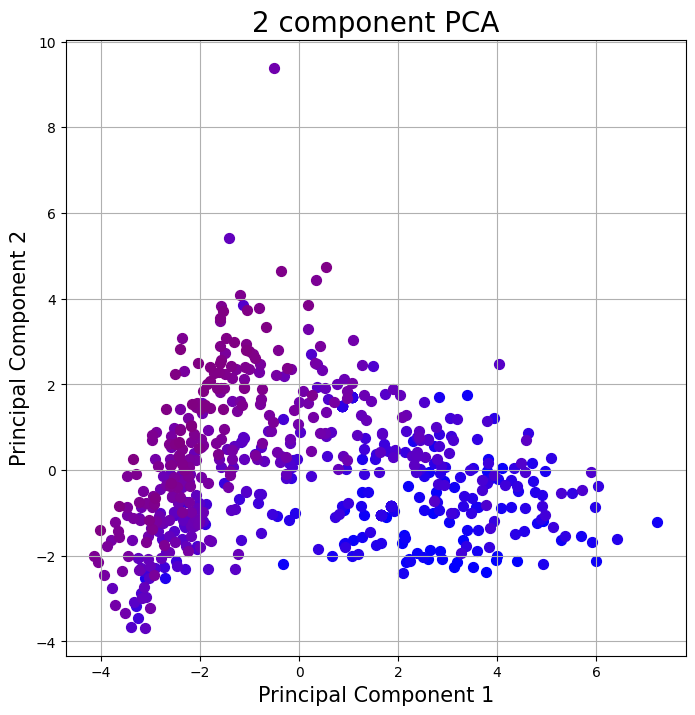

In [ ]:
avfig = plt.figure(figsize = (8,8))
axav = avfig.add_subplot(1,1,1) 
axav.set_xlabel('Principal Component 1', fontsize = 15)
axav.set_ylabel('Principal Component 2', fontsize = 15)
axav.set_title('2 component PCA', fontsize = 20)

targets1 = list(stdized1['player'])
colors1 = bp
for target, color in zip(targets1,colors1):
    indicesToKeep = AVDF['player'] == target
    axav.scatter(AVDF.loc[indicesToKeep, 'principal component 1']
               , AVDF.loc[indicesToKeep, 'principal component 2']
               , c = str(color)
               , s = 50)
axav.grid()

In [38]:
sum([float(i)/sum(pcaAV.explained_variance_) for i in pcaAV.explained_variance_][:4])

0.8085166650253659